# Project Overview

The goal of this project is to explore and find unexpected trends in how much companies have been sold for over the past 15 years. Traditionally, key cash flow metrics such as EBITDA (soon to be defined) and revenue, along with capital structure and risk, are the primary tools used throughout the finance world to determine how much a company is worth and ultimately sold for to a buyer. My hope is to better understand how a variety of variables, such as total headcount, geographical location, industry, total debt, and others impact a company's value. I am particularly interested in what metrics can be used to predict the value of a company per employee (a "per capita" value of sorts) to see if there are interesting trends among the companies that have a small number of employees but a high company value.

In addition to various visualizations, I plan to utilize a variety of different methods to see if I can train model to predict the value of a company based various factors. 

I have included a variable guide (Section 1) to help someone from a none finance background understand the variables used in this analysis. 

Data for this project currently is pulled from Capital IQ (In compliance with UVA's license with Capital IQ). Please note that due to this license the raw data is not available. 

I am using this project as a showcase for skills I am learning as a graduate student in University of Virginia’s Master of Science in Data Science and will continuously update the project with new methods and tools I learn about in the program.

Thank you!



# Table of Contents

1) Variable Guide


2) Pulling in Data / inital Cleaning


3) Looking at data types 


4) Detailed variable by variable cleaning using ProfileReport


5) Exploratory Data Analysis
     - 5.1 Looking at categorical variables 
     - 5.2 Covariance of quantitative variables
     - 5.3 A few querey like functions (will be added to dashboard at a later date)
     - 5.4 Looking into percentiles of headcount and TValue_per_capita (how to handle outliers)

# 1. Variable Guide

| Variable       | Description |
|-----------|------|
| id    |  Identification number for each transaction  |
| target   | Company being purchased   | 
| description_short | Short description of the target's business  |
| TValue_per_capita    | The amount the target is sold for (transaction_value) divided by target's number of employees (headcount)  |
| TRev_per_capita   |  Target's revenue divided by target's number of employees (headcount)  | 
| TEbitda_per_capita | Target's EBITDA divided by target's number of employees (headcount)    |
| target_headcount    | Target's number of employees   |
| transaction_value_mm   | The amount the target company was sold for (in millions). In other words, how much the company is worth  | 
| target_ebitda | The pre-debt and pre-tax cashflow of the target, a measure of how profitable the target is. While slightly more nuanced, be thought of as the profits of the target in this analysis   |
| target_rev    | The revenue (money earned prior to paying any expenses, such as salaries, cost of raw materials etc. )   |
| ebitda_multiple   | The transaction_value_mm divided by target EBITDA   | 
| rev_multiple | The transaction_value_mm divided by target revenue 76   |
| date    | date the transaction was announced   |
| narrow_industry   | Detailed description of the industry the target operates in   | 
| broad_industry | broad description of the industry the target operates in    |
| country    | country the target is located in   |
| region   | region of the world the target is located in   | 
| deal_status |  Is the deal closed (target was sold), announced (target is intended to be sold, subject to regulatory approval) and canceled (target or buyer backed out / was blocked by regulators |
| sellers   | Owners of the target selling it to the buyers   | 
| target_description   | Longer description of the target's business   | 
| public_or_private   | Is the target public (traded on a stock exchange) or privately owned  | 
| address   | address of headquarters   | 
| buyer_rev   | revenue of buyer   | 
| buyer_ebitda   | EBITDA of buyer   | 
| buyer_debt   | total debt (money owned to banks and other parties) of the buyer   | 
| target_debt   | total debt (money owned to banks and other parties) of the target   | 
| enterprise_value_mm   | An additional measure of value that does not come from the transaction, takes factors like debt into account   | 
| month   | month of the transaction   | 
| year   | year of the transaction   |
| day   | day of the transaction   |


# 2. Pulling in the Data

In [1]:
import numpy as np
import pandas as pd
import sidetable
import weighted 
from scipy import stats 
from sklearn import manifold
from sklearn import metrics
from matplotlib import pyplot as plt
import prince
import regex as re
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
M_A_2021 = pd.read_excel("2021_data.xls", header= 7)
M_A_2020 = pd.read_excel("2020_data.xls", header= 7)
M_A_2019 = pd.read_excel("2019_data.xls", header= 7)
M_A_2018 = pd.read_excel("2018_data.xls", header= 7)
M_A_2017 = pd.read_excel("2017_data.xls", header= 7)
M_A_2016 = pd.read_excel("2016_data.xls", header= 7)
M_A_2015 = pd.read_excel("2015_data.xls", header= 7)
M_A_2014 = pd.read_excel("2014_data.xls", header= 7)
M_A_2013 = pd.read_excel("2013_data.xls", header= 7)
M_A_2012 = pd.read_excel("2012_data.xls", header= 7)
M_A_2011 = pd.read_excel("2011_data.xls", header= 7)
M_A_2010 = pd.read_excel("2010_data.xls", header= 7)
M_A_2009 = pd.read_excel("2009_data.xls", header= 7)
M_A_2008 = pd.read_excel("2008_data.xls", header= 7)
M_A_2007 = pd.read_excel("2007_data.xls", header= 7)


In [3]:
Starting_df = pd.concat([M_A_2021,
                         M_A_2020,
                         M_A_2019,
                         M_A_2018,
                         M_A_2017,
                         M_A_2016,
                         M_A_2015,
                         M_A_2014,
                         M_A_2013,
                         M_A_2012,
                         M_A_2011,
                         M_A_2010,
                         M_A_2009,
                         M_A_2008,
                         M_A_2007])
starting_col_name = Starting_df.columns
starting_col_name

Index(['All Transactions Announced Date', 'Target/Issuer', 'Exchange:Ticker',
       'Transaction Types', 'Transaction Status',
       'Total Transaction Value ($USDmm, Historical rate)',
       'Implied Enterprise Value ($USDmm, Historical rate)',
       'Buyers/Investors', 'Sellers', 'CIQ Transaction ID',
       'M&A Announced Date', 'Business Description [Target/Issuer]',
       'Industry Classifications [Target/Issuer]',
       'Primary Industry [Target/Issuer]', 'Primary Sector [Target/Issuer]',
       'Short Business Description [Target/Issuer]',
       'Company Type [Target/Issuer]',
       'Country/Region of Incorporation [Target/Issuer]',
       'Geographic Region [Target/Issuer]', 'Primary Address [Target/Issuer]',
       'Target/Issuer LTM Financials - EBITDA (at Announcement) ($USDmm, Historical rate)',
       'Target/Issuer LTM Financials - Total Revenue (at Announcement) ($USDmm, Historical rate)',
       'Acquirer LTM Financials - EBITDA (at Announcement) ($USDmm, Histor

#### Renaming columns, also pulling out classification incase needed later, deleted extra date column

In [4]:
clean_df = Starting_df.rename(columns = {  'All Transactions Announced Date':'date', 
                                           'Target/Issuer':'target', 
                                           'Exchange:Ticker':'ticker',
                                           'Transaction Types':'deal_type', 
                                           'Transaction Status':'deal_status',
                                           'Total Transaction Value ($USDmm, Historical rate)':'transaction_value_mm',
                                           'Implied Enterprise Value ($USDmm, Historical rate)':'enterprise_value_mm',
                                           'Buyers/Investors':'buyer', 
                                           'Sellers':'sellers', 
                                           'CIQ Transaction ID':'id',
                                           'M&A Announced Date':'extra_date_to_delete', 
                                           'Business Description [Target/Issuer]':'target_description',
                                           'Industry Classifications [Target/Issuer]':'full_classification',
                                           'Primary Industry [Target/Issuer]':'narrow_industry', 
                                           'Primary Sector [Target/Issuer]':'broad_industry',
                                           'Short Business Description [Target/Issuer]':'description_short',
                                           'Company Type [Target/Issuer]':'public_or_private',
                                           'Country/Region of Incorporation [Target/Issuer]':'country',
                                           'Geographic Region [Target/Issuer]':'region', 
                                           'Primary Address [Target/Issuer]':'address',
                                           'Target/Issuer LTM Financials - EBITDA (at Announcement) ($USDmm, Historical rate)':'target_ebitda',
                                           'Target/Issuer LTM Financials - Total Revenue (at Announcement) ($USDmm, Historical rate)':'target_rev',
                                           'Acquirer LTM Financials - EBITDA (at Announcement) ($USDmm, Historical rate)':'buyer_ebitda',
                                           'Acquirer LTM Financials - Total Revenue (at Announcement) ($USDmm, Historical rate)':'buyer_rev',
                                           'Number of Employees - Global (Latest) [Target/Issuer]':'target_headcount',
                                           'Number of Employees - Global (Latest) [Buyers/Investors]':'buyer_headcount',
                                           'Acquirer LTM Financials - Total Debt (at Announcement) ($USDmm, Historical rate)':'buyer_debt',
                                           'Target/Issuer LTM Financials - Total Debt (at Announcement) ($USDmm, Historical rate)':'target_debt'})

## delete extra_date_to_delete col
## pull out classification, buyer_headcount, ticket
clean_df = clean_df.drop('extra_date_to_delete', axis=1)
classification_df = clean_df[['id','full_classification']]
buyer_headcount_df = clean_df[['id','full_classification']]
ticker_df = clean_df[['id','ticker']]

clean_df = clean_df.drop(['full_classification','buyer_headcount','ticker'], axis=1)


#

#### converting '-' to missing values

In [5]:
clean_df = clean_df.replace(['-'], np.nan)
clean_df

,date,target,deal_type,deal_status,transaction_value_mm,enterprise_value_mm,buyer,sellers,id,target_description,...,country,region,address,target_ebitda,target_rev,buyer_ebitda,buyer_rev,target_headcount,buyer_debt,target_debt
0,2021-08-13,zooplus AG (XTRA:ZO1),Merger/Acquisition,Announced,3398.77,3217.61,Hellman & Friedman LLC,Maxburg Beteiligungen Ii Gmbh & Co. Kg,IQTR1677395306,zooplus AG operates as an online retailer of p...,...,Germany,Europe,"Headquarters\nSonnenstrasse 15 \nMunich, Bavar...",95.630,2200.42,NaN,NaN,793.0,NaN,107.910
1,2021-08-13,Willis Re,Merger/Acquisition,Announced,4000.00,4000.00,Arthur J. Gallagher & Co. (NYSE:AJG),Willis Towers Watson Public Limited Company (N...,IQTR1677413386,NaN,...,NaN,Europe,Headquarters\nUnited Kingdom,NaN,NaN,1982.60,7426.30,NaN,6391.10,NaN
2,2021-08-13,Frazer-Nash Consultancy Ltd.,Merger/Acquisition,Announced,406.08,394.99,"KBR, Inc. (NYSE:KBR)",Babcock International Group PLC (LSE:BAB),IQTR1677414361,Frazer-Nash Consultancy Ltd. offers engineerin...,...,United Kingdom,Europe,Headquarters\nStonebridge House\nDorking Busin...,NaN,139.29,408.50,5842.00,700.0,1855.00,NaN
3,2021-08-13,"IRISYS, LLC",Merger/Acquisition,Closed,51.69,51.69,"Recro Pharma, Inc. (NasdaqCM:REPH)",NaN,IQTR1677414432,"IRISYS, LLC provides contract pharmaceutical p...",...,United States,United States and Canada,Headquarters\n6828 Nancy Ridge Drive\nSuite100...,NaN,NaN,2.54,64.02,59.0,90.25,NaN
4,2021-08-13,"Nanjing Xiezhong Lexus Automobile Sales Co., Ltd",Merger/Acquisition,Announced,64.84,64.84,"Dongguan Meixin Business Consulting Co, Ltd.","Yueqing Youxu Industrial Development Co., Ltd",IQTR1677563556,NaN,...,NaN,Asia / Pacific,Headquarters\nChina,NaN,107.87,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,2007-01-02,Beijing Jin Ma Wen Hua Yuan Properties Develop...,Merger/Acquisition,Closed,12.85,85.68,Shanghai Industrial Urban Development Group Li...,NaN,IQTR54656853,Beijing Jin Ma Wen Hua Yuan Properties Develop...,...,China,Asia / Pacific,Headquarters\nBeijing\nChina,NaN,NaN,15.41,336.45,NaN,357.36,NaN
8579,2007-01-01,Isralift Services (1973) Ltd.,Merger/Acquisition,Cancelled,59.27,59.27,Schindler Nechushtan Elevators Ltd.,Isralift Industries (1972) Ltd.,IQTR30913305,Isralift Services (1973) Ltd. offers elevator ...,...,NaN,Africa / Middle East,Headquarters\nIsrael,NaN,NaN,NaN,NaN,0.0,NaN,NaN
8580,2007-01-01,The Château de Bagnols,Merger/Acquisition,Closed,32.99,32.99,Von Essen Hotels Limited,NaN,IQTR30962008,The Château de Bagnols operates as a hotel in ...,...,France,Europe,Headquarters\n67 quai Charles de Gaulle \nLyon...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8581,2007-01-01,Plastikkart Akilli Kart Iletisim Sistemleri Sa...,Merger/Acquisition,Effective,2.36,19.22,Anel Telekomünikasyon Elektronik Sistemleri Sa...,NaN,IQTR31000042,Plastikkart Akilli Kart Iletisim Sistemleri Sa...,...,Turkey,Africa / Middle East,Headquarters\nAlipasa Mahallesi\nTrablusgarp B...,-0.318,12.99,2.10,30.68,150.0,0.03,0.001


# 3. Looking at data types / setting index

In [6]:
# looking at data types

clean_df = clean_df.astype({'date':'datetime64',
                           'target':'string',
                           'deal_type':'category',
                           'deal_status':'category',
                           'transaction_value_mm':'float64',
                           'enterprise_value_mm':'float64',
                           'buyer':'string',
                           'sellers':'string',
                           'id':'string', 
                           'target_description':'string',
                           'broad_industry':'category',
                           'narrow_industry':'category',
                           'description_short':'string',
                           'public_or_private':'category',
                           'country':'category',
                           'region':'category',
                           'address':'string'})

In [7]:
clean_df.dtypes

date                    datetime64[ns]
target                          string
deal_type                     category
deal_status                   category
transaction_value_mm           float64
enterprise_value_mm            float64
buyer                           string
sellers                         string
id                              string
target_description              string
narrow_industry               category
broad_industry                category
description_short               string
public_or_private             category
country                       category
region                        category
address                         string
target_ebitda                  float64
target_rev                     float64
buyer_ebitda                   float64
buyer_rev                      float64
target_headcount               float64
buyer_debt                     float64
target_debt                    float64
dtype: object

In [8]:
clean_df.set_index('id').reset_index()
clean_df.head()


,date,target,deal_type,deal_status,transaction_value_mm,enterprise_value_mm,buyer,sellers,id,target_description,...,country,region,address,target_ebitda,target_rev,buyer_ebitda,buyer_rev,target_headcount,buyer_debt,target_debt
0,2021-08-13,zooplus AG (XTRA:ZO1),Merger/Acquisition,Announced,3398.77,3217.61,Hellman & Friedman LLC,Maxburg Beteiligungen Ii Gmbh & Co. Kg,IQTR1677395306,zooplus AG operates as an online retailer of p...,...,Germany,Europe,"Headquarters Sonnenstrasse 15 Munich, Bavaria...",95.63,2200.42,NaN,NaN,793.0,NaN,107.91
1,2021-08-13,Willis Re,Merger/Acquisition,Announced,4000.00,4000.00,Arthur J. Gallagher & Co. (NYSE:AJG),Willis Towers Watson Public Limited Company (N...,IQTR1677413386,<NA>,...,NaN,Europe,Headquarters United Kingdom,NaN,NaN,1982.60,7426.30,NaN,6391.10,NaN
2,2021-08-13,Frazer-Nash Consultancy Ltd.,Merger/Acquisition,Announced,406.08,394.99,"KBR, Inc. (NYSE:KBR)",Babcock International Group PLC (LSE:BAB),IQTR1677414361,Frazer-Nash Consultancy Ltd. offers engineerin...,...,United Kingdom,Europe,Headquarters Stonebridge House Dorking Busines...,NaN,139.29,408.50,5842.00,700.0,1855.00,NaN
3,2021-08-13,"IRISYS, LLC",Merger/Acquisition,Closed,51.69,51.69,"Recro Pharma, Inc. (NasdaqCM:REPH)",<NA>,IQTR1677414432,"IRISYS, LLC provides contract pharmaceutical p...",...,United States,United States and Canada,Headquarters 6828 Nancy Ridge Drive Suite100 ...,NaN,NaN,2.54,64.02,59.0,90.25,NaN
4,2021-08-13,"Nanjing Xiezhong Lexus Automobile Sales Co., Ltd",Merger/Acquisition,Announced,64.84,64.84,"Dongguan Meixin Business Consulting Co, Ltd.","Yueqing Youxu Industrial Development Co., Ltd",IQTR1677563556,<NA>,...,NaN,Asia / Pacific,Headquarters China,NaN,107.87,NaN,NaN,NaN,NaN,NaN


#### Adding in new columns / reordering

In [9]:
## per_capita
clean_df['target_headcount'] = clean_df['target_headcount'].replace([0], np.nan)
clean_df['TValue_per_capita'] = round(clean_df['transaction_value_mm']/clean_df['target_headcount'],4)
clean_df['TRev_per_capita'] = round(clean_df['target_rev']/clean_df['target_headcount'],4)
clean_df['TEbitda_per_capita'] = round(clean_df['target_ebitda']/clean_df['target_headcount'],4)
# more precise date columns (month, year, day)
clean_df['year'] = clean_df['date'].dt.year
clean_df['month'] = clean_df['date'].dt.month
clean_df['day'] = clean_df['date'].dt.day
## multiples
clean_df['ebitda_multiple'] = round(clean_df['transaction_value_mm']/clean_df['target_ebitda'],2)
clean_df['rev_multiple'] = round(clean_df['transaction_value_mm']/clean_df['target_rev'],2)


# reording columns
cols = clean_df.columns.tolist()

test = len(cols)

cols_new = ['id',
 'target',
 'description_short',
 'country',
 'TValue_per_capita',
 'TRev_per_capita',
 'TEbitda_per_capita',
 'target_headcount',
 'transaction_value_mm',
 'target_ebitda',
 'target_rev',
 'ebitda_multiple',
 'rev_multiple',
 'date',
 'narrow_industry',
 'broad_industry',
 'region',
 'deal_type',
 'deal_status',
 'buyer',
 'sellers',
 'target_description',
 'public_or_private',
 'address',
 'buyer_rev',
 'buyer_ebitda',
 'buyer_debt',
 'target_debt',
 'enterprise_value_mm',
 'month',
 'year',
 'day']



clean_df = clean_df[cols_new]
clean_df

,id,target,description_short,country,TValue_per_capita,TRev_per_capita,TEbitda_per_capita,target_headcount,transaction_value_mm,target_ebitda,...,public_or_private,address,buyer_rev,buyer_ebitda,buyer_debt,target_debt,enterprise_value_mm,month,year,day
0,IQTR1677395306,zooplus AG (XTRA:ZO1),zooplus AG operates as an online retailer of p...,Germany,4.2860,2.7748,0.1206,793.0,3398.77,95.630,...,Public Company,"Headquarters Sonnenstrasse 15 Munich, Bavaria...",NaN,NaN,NaN,107.910,3217.61,8,2021,13
1,IQTR1677413386,Willis Re,<NA>,NaN,NaN,NaN,NaN,NaN,4000.00,NaN,...,Private Company,Headquarters United Kingdom,7426.30,1982.60,6391.10,NaN,4000.00,8,2021,13
2,IQTR1677414361,Frazer-Nash Consultancy Ltd.,Frazer-Nash Consultancy Ltd. offers engineerin...,United Kingdom,0.5801,0.1990,NaN,700.0,406.08,NaN,...,Private Company,Headquarters Stonebridge House Dorking Busines...,5842.00,408.50,1855.00,NaN,394.99,8,2021,13
3,IQTR1677414432,"IRISYS, LLC","IRISYS, LLC provides contract pharmaceutical p...",United States,0.8761,NaN,NaN,59.0,51.69,NaN,...,Private Company,Headquarters 6828 Nancy Ridge Drive Suite100 ...,64.02,2.54,90.25,NaN,51.69,8,2021,13
4,IQTR1677563556,"Nanjing Xiezhong Lexus Automobile Sales Co., Ltd",<NA>,NaN,NaN,NaN,NaN,NaN,64.84,NaN,...,Private Company,Headquarters China,NaN,NaN,NaN,NaN,64.84,8,2021,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,IQTR54656853,Beijing Jin Ma Wen Hua Yuan Properties Develop...,Beijing Jin Ma Wen Hua Yuan Properties Develop...,China,NaN,NaN,NaN,NaN,12.85,NaN,...,Private Company,Headquarters Beijing China,336.45,15.41,357.36,NaN,85.68,1,2007,2
8579,IQTR30913305,Isralift Services (1973) Ltd.,Isralift Services (1973) Ltd. offers elevator ...,NaN,NaN,NaN,NaN,NaN,59.27,NaN,...,Private Company,Headquarters Israel,NaN,NaN,NaN,NaN,59.27,1,2007,1
8580,IQTR30962008,The Château de Bagnols,The Château de Bagnols operates as a hotel in ...,France,NaN,NaN,NaN,NaN,32.99,NaN,...,Private Company,"Headquarters 67 quai Charles de Gaulle Lyon, ...",NaN,NaN,NaN,NaN,32.99,1,2007,1
8581,IQTR31000042,Plastikkart Akilli Kart Iletisim Sistemleri Sa...,Plastikkart Akilli Kart Iletisim Sistemleri Sa...,Turkey,0.0157,0.0866,-0.0021,150.0,2.36,-0.318,...,Public Company,Headquarters Alipasa Mahallesi Trablusgarp Bul...,30.68,2.10,0.03,0.001,19.22,1,2007,1


#### data type check

In [10]:
clean_df.dtypes

id                              string
target                          string
description_short               string
country                       category
TValue_per_capita              float64
TRev_per_capita                float64
TEbitda_per_capita             float64
target_headcount               float64
transaction_value_mm           float64
target_ebitda                  float64
target_rev                     float64
ebitda_multiple                float64
rev_multiple                   float64
date                    datetime64[ns]
narrow_industry               category
broad_industry                category
region                        category
deal_type                     category
deal_status                   category
buyer                           string
sellers                         string
target_description              string
public_or_private             category
address                         string
buyer_rev                      float64
buyer_ebitda             

# 4. Detailed variable by variable cleaning using ProfileReport

## Inital dashboard

In [11]:
profile = ProfileReport(clean_df, 
                        title='Full clean_df Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Some inital thoughts with this:

- Long term goal is fitting various models to predict TValue_per_capita, will need to do more feature engineering specifc to likely headcount and transaction value to get better model. However, not something to focus on for EDA.

### Remaining Cleaning:

- There are inf, those need to become NaN

- Remove Zeros from Transaction_Value_mm 

- Investigate what to do with negatives/zeros for target_rev and buyer buyer_rev
            
- Double check that the above change fixes the neg in the rev/ebitda multiples

- Take out deal_type (All M&A)

- remove pt from description (make NaN)



# Further cleaning from ProfileReport Dashboard 

#### "inf" removal 

In [12]:
clean_df = clean_df.replace([np.inf], 0)
max(clean_df['rev_multiple'])
min(clean_df['rev_multiple']) ## double checking no -inf

-8092.5

#### Transaction_Value_mm zeros

In [13]:
clean_df['transaction_value_mm'] = clean_df['transaction_value_mm'].replace([0], np.nan)

In [14]:
min(clean_df['transaction_value_mm'])

0.001

#### Target_rev and buyer buyer_rev 
(since such small amount of clean_df, assuming error and assigning NaN. Possible to have negative rev but is very rare and misleading. Skewing many metrics as well.)


In [15]:
clean_df[clean_df['target_rev'] < 0] = np.nan
clean_df[clean_df['buyer_rev'] < 0] = np.nan

#### Removing deal type column (repetative since all the same)

In [16]:
clean_df = clean_df.drop('deal_type', axis=1)
clean_df.columns

Index(['id', 'target', 'description_short', 'country', 'TValue_per_capita',
       'TRev_per_capita', 'TEbitda_per_capita', 'target_headcount',
       'transaction_value_mm', 'target_ebitda', 'target_rev',
       'ebitda_multiple', 'rev_multiple', 'date', 'narrow_industry',
       'broad_industry', 'region', 'deal_status', 'buyer', 'sellers',
       'target_description', 'public_or_private', 'address', 'buyer_rev',
       'buyer_ebitda', 'buyer_debt', 'target_debt', 'enterprise_value_mm',
       'month', 'year', 'day'],
      dtype='object')

#### Re-mapping clean_df-types

In [17]:
clean_df = clean_df.astype({'id':'string', 
                            'target':'string', 
                            'description_short':'string', 
                            'TValue_per_capita':'float64',
                            'TRev_per_capita':'float64', 
                            'TEbitda_per_capita':'float64', 
                            'target_headcount':'float64',
                            'transaction_value_mm':'float64', 
                            'target_ebitda':'float64', 
                            'target_rev':'float64',
                            'ebitda_multiple':'float64', 
                            'rev_multiple':'float64', 
                            'date':'datetime64', 
                            'narrow_industry':'category',
                            'broad_industry':'category', 
                            'country':'category', 
                            'region':'category', 
                            'deal_status':'category', 
                            'buyer':'string',
                            'sellers':'string', 
                            'target_description':'string', 
                            'public_or_private':'category', 
                            'address':'string',
                            'buyer_rev':'float64', 
                            'buyer_ebitda':'float64', 
                            'buyer_debt':'float64', 
                            'target_debt':'float64',
                            'enterprise_value_mm':'float64', 
                            'month':'float64', 
                            'year':'float64', 
                            'day':'float64'})
clean_df.dtypes

id                              string
target                          string
description_short               string
country                       category
TValue_per_capita              float64
TRev_per_capita                float64
TEbitda_per_capita             float64
target_headcount               float64
transaction_value_mm           float64
target_ebitda                  float64
target_rev                     float64
ebitda_multiple                float64
rev_multiple                   float64
date                    datetime64[ns]
narrow_industry               category
broad_industry                category
region                        category
deal_status                   category
buyer                           string
sellers                         string
target_description              string
public_or_private             category
address                         string
buyer_rev                      float64
buyer_ebitda                   float64
buyer_debt               

#### Need to re calc the multiples made before since columns have been tweaked


In [18]:
## per_capita
clean_df['target_headcount'] = clean_df['target_headcount'].replace([0], np.nan)
clean_df['TValue_per_capita'] = round(clean_df['transaction_value_mm']/clean_df['target_headcount'],4)
clean_df['TRev_per_capita'] = round(clean_df['target_rev']/clean_df['target_headcount'],4)
clean_df['TEbitda_per_capita'] = round(clean_df['target_ebitda']/clean_df['target_headcount'],4)
# multiples
clean_df['ebitda_multiple'] = round(clean_df['transaction_value_mm']/clean_df['target_ebitda'],2)
clean_df['rev_multiple'] = round(clean_df['transaction_value_mm']/clean_df['target_rev'],2)

## Runing Dashboard a second time

In [19]:
profile2 = ProfileReport(clean_df, 
                        title='Full clean_df Profiling Report (round 2)',
                        html={'style':{'full_width':True}},
                       minimal=True)
profile2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Thoughts after second round with ProfileReport

Some feature engeering will need to be done regarding outliers etc. with the TValue_per_capita and headcount variables before any kind of modeling can be performed. However, at this point, data is cleaned for exploratory Data Analysis. 

In [20]:
clean_df = clean_df.set_index('id').reset_index()
clean_df.astype({'id':'string'})

,id,target,description_short,country,TValue_per_capita,TRev_per_capita,TEbitda_per_capita,target_headcount,transaction_value_mm,target_ebitda,...,public_or_private,address,buyer_rev,buyer_ebitda,buyer_debt,target_debt,enterprise_value_mm,month,year,day
0,IQTR1677395306,zooplus AG (XTRA:ZO1),zooplus AG operates as an online retailer of p...,Germany,4.2860,2.7748,0.1206,793.0,3398.77,95.630,...,Public Company,"Headquarters Sonnenstrasse 15 Munich, Bavaria...",NaN,NaN,NaN,107.910,3217.61,8.0,2021.0,13.0
1,IQTR1677413386,Willis Re,<NA>,NaN,NaN,NaN,NaN,NaN,4000.00,NaN,...,Private Company,Headquarters United Kingdom,7426.30,1982.60,6391.10,NaN,4000.00,8.0,2021.0,13.0
2,IQTR1677414361,Frazer-Nash Consultancy Ltd.,Frazer-Nash Consultancy Ltd. offers engineerin...,United Kingdom,0.5801,0.1990,NaN,700.0,406.08,NaN,...,Private Company,Headquarters Stonebridge House Dorking Busines...,5842.00,408.50,1855.00,NaN,394.99,8.0,2021.0,13.0
3,IQTR1677414432,"IRISYS, LLC","IRISYS, LLC provides contract pharmaceutical p...",United States,0.8761,NaN,NaN,59.0,51.69,NaN,...,Private Company,Headquarters 6828 Nancy Ridge Drive Suite100 ...,64.02,2.54,90.25,NaN,51.69,8.0,2021.0,13.0
4,IQTR1677563556,"Nanjing Xiezhong Lexus Automobile Sales Co., Ltd",<NA>,NaN,NaN,NaN,NaN,NaN,64.84,NaN,...,Private Company,Headquarters China,NaN,NaN,NaN,NaN,64.84,8.0,2021.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104980,IQTR54656853,Beijing Jin Ma Wen Hua Yuan Properties Develop...,Beijing Jin Ma Wen Hua Yuan Properties Develop...,China,NaN,NaN,NaN,NaN,12.85,NaN,...,Private Company,Headquarters Beijing China,336.45,15.41,357.36,NaN,85.68,1.0,2007.0,2.0
104981,IQTR30913305,Isralift Services (1973) Ltd.,Isralift Services (1973) Ltd. offers elevator ...,NaN,NaN,NaN,NaN,NaN,59.27,NaN,...,Private Company,Headquarters Israel,NaN,NaN,NaN,NaN,59.27,1.0,2007.0,1.0
104982,IQTR30962008,The Château de Bagnols,The Château de Bagnols operates as a hotel in ...,France,NaN,NaN,NaN,NaN,32.99,NaN,...,Private Company,"Headquarters 67 quai Charles de Gaulle Lyon, ...",NaN,NaN,NaN,NaN,32.99,1.0,2007.0,1.0
104983,IQTR31000042,Plastikkart Akilli Kart Iletisim Sistemleri Sa...,Plastikkart Akilli Kart Iletisim Sistemleri Sa...,Turkey,0.0157,0.0866,-0.0021,150.0,2.36,-0.318,...,Public Company,Headquarters Alipasa Mahallesi Trablusgarp Bul...,30.68,2.10,0.03,0.001,19.22,1.0,2007.0,1.0


In [22]:
clean_df.dtypes

id                              object
target                          string
description_short               string
country                       category
TValue_per_capita              float64
TRev_per_capita                float64
TEbitda_per_capita             float64
target_headcount               float64
transaction_value_mm           float64
target_ebitda                  float64
target_rev                     float64
ebitda_multiple                float64
rev_multiple                   float64
date                    datetime64[ns]
narrow_industry               category
broad_industry                category
region                        category
deal_status                   category
buyer                           string
sellers                         string
target_description              string
public_or_private             category
address                         string
buyer_rev                      float64
buyer_ebitda                   float64
buyer_debt               

# 5 Exploratory Data Analysis

## 5.1 First looking into the categorical data

## visualizations for categorical variables (also year)

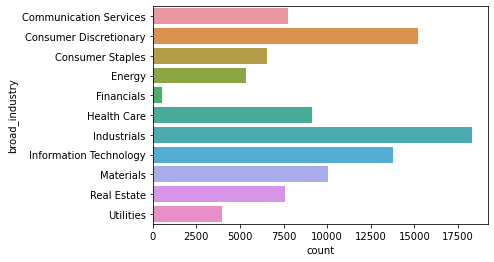

In [23]:
# most common industries
count_per_industry_global = sns.countplot(data=clean_df, y="broad_industry")

<AxesSubplot:>

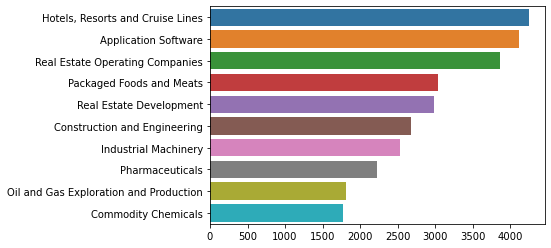

In [24]:
# most common sub - industries
count_of_narow = clean_df.groupby('narrow_industry').count().sort_values('id', ascending = False)
top_10_narrow = count_of_narow.iloc[0:10,:].reset_index()
narrow_cats = top_10_narrow['narrow_industry']
narrow_counts = top_10_narrow['id']
sns.barplot(x=list(narrow_counts), y=list(narrow_cats))

In [25]:
# industry medians in key variables
avg_size_deal_broad = round(clean_df.groupby('broad_industry').median().sort_values('TValue_per_capita', ascending = False),3)
avg_size_deal_broad.reset_index()
avg_size_deal_broad[['TValue_per_capita','transaction_value_mm', 'target_ebitda', 'target_rev','ebitda_multiple','rev_multiple']].reset_index()

,broad_industry,TValue_per_capita,transaction_value_mm,target_ebitda,target_rev,ebitda_multiple,rev_multiple
0,Energy,0.700,80.000,29.640,117.87,2.410,1.300
1,Real Estate,0.627,45.120,15.230,37.81,1.250,1.650
2,Utilities,0.517,64.370,88.240,217.94,2.060,0.750
3,Financials,0.380,37.010,28.100,43.74,5.200,2.160
4,Communication Services,0.303,50.755,21.590,75.86,2.660,1.065
5,Health Care,0.260,50.000,8.705,56.39,3.935,1.670
6,Information Technology,0.231,37.900,6.360,57.27,3.300,0.980
7,Materials,0.163,41.000,12.230,116.00,1.045,0.630
8,Industrials,0.151,40.640,14.470,94.28,3.130,0.650
9,Consumer Staples,0.127,45.855,21.300,148.91,2.710,0.510


In [26]:
# region medians in key variables
avg_size_deal_region= round(clean_df.groupby('region').median().sort_values('TValue_per_capita', ascending = False),3)
avg_size_deal_region.reset_index()
avg_size_deal_region[['TValue_per_capita','transaction_value_mm', 'target_ebitda', 'target_rev','ebitda_multiple','rev_multiple']].reset_index()

,region,TValue_per_capita,transaction_value_mm,target_ebitda,target_rev,ebitda_multiple,rev_multiple
0,United States and Canada,0.458,71.000,13.64,100.00,8.100,1.66
1,Europe,0.287,52.390,22.17,115.74,3.735,0.78
2,Latin America and Caribbean,0.119,50.000,43.47,142.37,1.350,0.68
3,Africa / Middle East,0.099,35.635,16.50,94.64,1.250,0.49
4,Asia / Pacific,0.075,29.590,9.96,62.50,1.310,0.55


<AxesSubplot:>

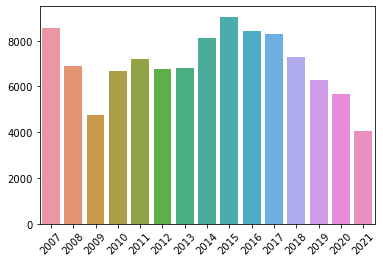

In [27]:
yearly_deals = round(clean_df.groupby('year').count().sort_values('year', ascending = True),3)
just_years = yearly_deals['id']
my_df = pd.DataFrame(just_years).reset_index()
years = my_df['year']
years = [int(i) for i in years]
deals_per_year = my_df['id']
plt.xticks(rotation=45)

sns.barplot(x=list(years), y=list(deals_per_year))


### Some thoughts

- suprising to see the drop after 2015, drop from 2008/2009 makes sense (low capital available for businesses)
- regional transaction values as expected
- info tech as 7th for value per employee is very suprising. Also strange to see hotel chains / other hositality as the top sub-industry

## 5.2 Covariance of quantitative variables

<AxesSubplot:>

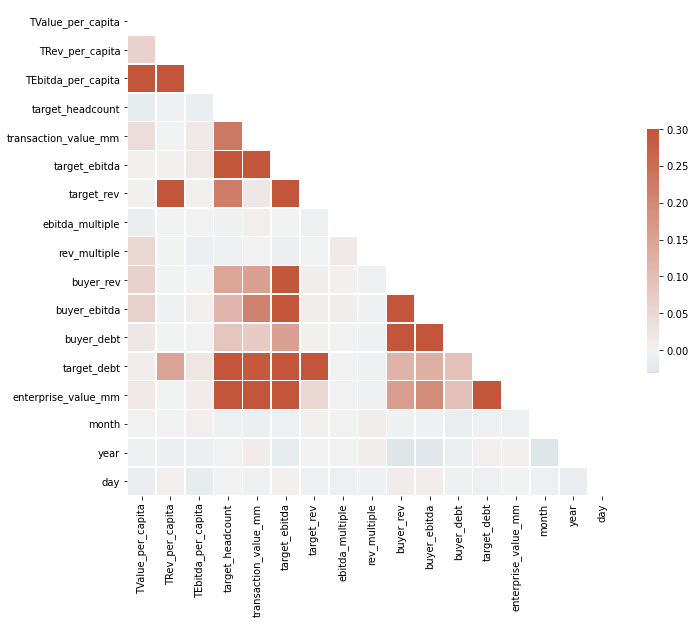

In [28]:
clean_corr = clean_df.corr()
clean_corr
clean_mask = np.triu(np.ones_like(clean_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(clean_corr, mask=clean_mask, cmap=cmap, vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})



### Some thoughts

- Something that stands out almost instantly here is that there are very few parameters that have a meaningful relationship with TValue_per_capita, meaning it will likely be very difficult to use traditional regression methods to predict TValue_per_capita based on the existing parameters. 
- Different than TValue_per_capita, transaction_value_mm (measuring value without considering the headcount is modestly positively correlated with numerious non-categorical paramters. I think regreggion techniques could be used here. 
- no strong negative corelations among categorical variables. 
- EBITDA strongly correlated with many variables related to buyer, not 100% sure why. I would not have thought there would be a relation.


## 5.3 A few querey like functions (will be added to dashboard at a later date)

Personally I like this to see full text since I am only displaying short description but optional. Will cause dataframes to show full text in every column (a wrap text of sorts to use excel language)

In [29]:
pd.set_option("display.max_colwidth", None)

#### Biggest deal per country

In [30]:
def biggest_deal_chart(country_input):
    try: 
        just_country_mask = clean_df['country'] == country_input
        just_country = clean_df[just_country_mask]

        biggest_deal_country_value = max(just_country['transaction_value_mm'])
        biggest_deal_country_value
        one_row = just_country[just_country['transaction_value_mm'] ==biggest_deal_country_value]

        biggest_target = one_row['target']
        biggest_target_description = one_row['description_short']
        biggest_target_headcount = one_row['target_headcount']
        biggest_target_EBITDA = one_row['target_ebitda']
        biggest_target_rev = one_row['target_rev']
        biggest_target_industry = one_row['narrow_industry']
        biggest_target_TV = one_row['TValue_per_capita']

        country_dict = {'biggest deal value': biggest_deal_country_value,
                   'target':biggest_target,
                   'bus. description':biggest_target_description,
                   'heacount':biggest_target_headcount,
                   'EBITDA':biggest_target_EBITDA,
                   'rev':biggest_target_rev,
                   'industry':biggest_target_industry,
                   'TVC_per_cap':biggest_target_TV
                  }

        df = pd.DataFrame(country_dict)
        df = df.transpose()
        
        col_val = df.columns[0]
        df = df.rename(columns = {col_val:country_input})
        
        return df
    except:
        print('Country not in df')
        

In [31]:
biggest_deal_chart('Ireland')

,Ireland
biggest deal value,192825.63
target,Allergan plc
bus. description,"Allergan plc, a pharmaceutical company, develops, manufactures, and commercializes branded pharmaceutical, device, biologic, surgical, and regenerative medicine products worldwide."
heacount,17400.0
EBITDA,8211.0
rev,19612.5
industry,Pharmaceuticals
TVC_per_cap,11.0819


## industry and other summary info per country

In [32]:
# need to re-do data types first
clean_df = clean_df.astype({'date':'datetime64',
                           'target':'string',
                           'deal_status':'category',
                           'transaction_value_mm':'float64',
                           'enterprise_value_mm':'float64',
                           'buyer':'string',
                           'sellers':'string',
                           'id':'string', 
                           'target_description':'string',
                           'broad_industry':'category',
                           'narrow_industry':'category',
                           'description_short':'string',
                           'public_or_private':'category',
                           'country':'category',
                           'region':'category',
                           'address':'string'})



,General Industry,Count
0,Information Technology,83
1,Health Care,60
2,Consumer Discretionary,58
3,Industrials,56
4,Consumer Staples,34


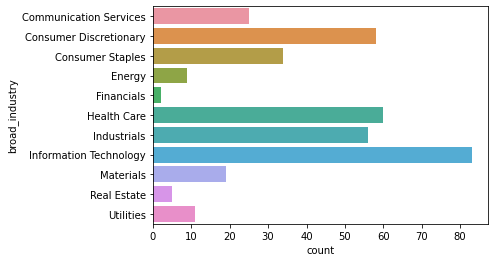

In [33]:
## function for broad industry summary by country

def industry_summary_country_level_broad(country):
    just_country_mask = clean_df['country'] == country
    just_country = clean_df[just_country_mask]
    
    #making plot
    count_per_industry = sns.countplot(data=just_country, y="broad_industry")
    largest_industry_per_country = just_country['broad_industry'].mode()
    
    # making df
    count_of_broad = just_country.groupby('broad_industry').count().sort_values('id', ascending = False)
    broad_top_5 = count_of_broad.iloc[0:5:,0:1]
    broad_top_5 = broad_top_5.reset_index()
    broad_top_5 = broad_top_5.rename(columns={'broad_industry':'General Industry', 
                                          'id':'Count'})
    broad_top_5

    label = 'Summary Info of ' + country + ' Industries (Broad)'
    
    return broad_top_5


industry_summary_country_level_broad('Ireland')

,Sub Industry,Count
0,Application Software,40
1,"Hotels, Resorts and Cruise Lines",32
2,Packaged Foods and Meats,17
3,Pharmaceuticals,14
4,Systems Software,12


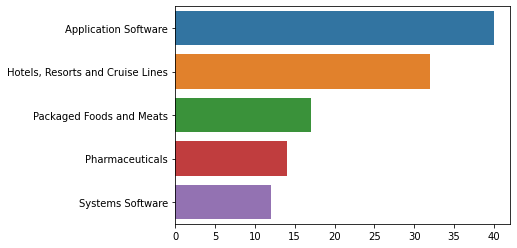

In [34]:
## function for narrow industry summary by country

def industry_summary_country_level_narrow(country):
    just_country_mask = clean_df['country'] == country
    just_country = clean_df[just_country_mask]
    
    #making plot
    count_of_narow = just_country.groupby('narrow_industry').count().sort_values('id', ascending = False)
    top_5_narrow = count_of_narow.iloc[0:5,:].reset_index()
    narrow_cats = top_5_narrow['narrow_industry']
    narrow_counts = top_5_narrow['id']
    sns.barplot(x=list(narrow_counts), y=list(narrow_cats))
    
    # making df
    sub_top_5 = top_5_narrow.iloc[:,0:2]
    sub_top_5 = sub_top_5.rename(columns={'narrow_industry':'Sub Industry', 
                                          'id':'Count'})
    sub_top = sub_top_5.iloc[0,0]

    label = 'Summary Info of ' + country + ' Industries (Narrow)'
    
    return sub_top_5


industry_summary_country_level_narrow('Ireland')



## 5.4 Looking into percentiles of headcount and TValue_per_capita (how to handle outliers)

CIQ will sometimes pull inaccurate headcount numbers (usually extremely low, only counting the CEO or board), which appears to be leading to extremes 

In [35]:
## function for percentiles
def percentiles(variable, df):
    per01 = df[variable].quantile(.01)
    per02 = df[variable].quantile(.02)
    per03 = df[variable].quantile(.03)
    per04 = df[variable].quantile(.04)
    per05 = df[variable].quantile(.05)
    per06 = df[variable].quantile(.06)
    per07 = df[variable].quantile(.07)
    per08 = df[variable].quantile(.08)
    per09 = df[variable].quantile(.09)
    per10 = df[variable].quantile(.1)
    per20 = df[variable].quantile(.2)
    per30 = df[variable].quantile(.3)
    per40 = df[variable].quantile(.4)
    per50 = df[variable].quantile(.5)
    per60 = df[variable].quantile(.6)
    per70 = df[variable].quantile(.7)
    per80 = df[variable].quantile(.8)
    per90 = df[variable].quantile(.9)
    per91 = df[variable].quantile(.91)
    per92 = df[variable].quantile(.92)
    per93 = df[variable].quantile(.93)
    per94 = df[variable].quantile(.94)
    per95 = df[variable].quantile(.95)
    per96 = df[variable].quantile(.96)
    per97 = df[variable].quantile(.97)
    per98 = df[variable].quantile(.98)
    per99 = df[variable].quantile(.99)
    per100 = df[variable].quantile(1)

    d = {
         'per01': per01,
         'per02': per02,
         'per03': per03,
         'per04': per04,
         'per05': per05,
         'per06': per06,
         'per07': per07,
         'per08': per08,
         'per09': per09,
         'per10': per10, 
         'per20': per20,
         'per30': per30,
         'per40': per40,
         'per50': per50,
         'per60': per60,
         'per70': per70,
         'per80': per80,
         'per90': per90,
         'per91': per91,
           'per92': per92,
           'per93': per93,
           'per94': per94,
           'per95': per95,
           'per96': per96,
           'per97': per97,
           'per98': per98,
         'per99': per99,
         'per100': per100,
        }
    my_df = pd.DataFrame(d,index=[0])
    my_df = my_df.rename({0:variable}, axis='index')
    return my_df

In [36]:
# no adjustments
no_adjustment_headcount = percentiles('target_headcount', clean_df)
no_adjustment_TV = percentiles('TValue_per_capita', clean_df)
pd.concat([no_adjustment_headcount, no_adjustment_TV]).transpose()

,target_headcount,TValue_per_capita
per01,2.00,0.000200
per02,3.00,0.000800
per03,5.00,0.001500
per04,7.00,0.002332
per05,10.00,0.003400
per06,13.00,0.004400
per07,17.00,0.005400
per08,20.00,0.006600
per09,25.00,0.007900
per10,29.00,0.009300


In [37]:
No_headcount_extremes = clean_df
headcount_filter = 15
TV_per_cap_filter = 35
heacount_screen = clean_df['target_headcount']>headcount_filter
TV_per_cap_screen = clean_df['TValue_per_capita']<TV_per_cap_filter
No_headcount_extremes = No_headcount_extremes[heacount_screen]
No_headcount_extremes = No_headcount_extremes[TV_per_cap_screen]
# No_headcount_extremes


### one thing to look at here is what are the industries with the super low/high extremes? country? could there be a trend?

<ipython-input-37-478312823faa>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  No_headcount_extremes = No_headcount_extremes[TV_per_cap_screen]


In [38]:
## with adjustments
No_headcount_extremes_headcount = percentiles('target_headcount', No_headcount_extremes)
No_headcount_extremes_TV = percentiles('TValue_per_capita', No_headcount_extremes)
pd.concat([No_headcount_extremes_headcount, No_headcount_extremes_TV]).transpose()

,target_headcount,TValue_per_capita
per01,20.00,0.000200
per02,22.00,0.000614
per03,26.00,0.001300
per04,30.00,0.002100
per05,35.00,0.003000
per06,38.00,0.004000
per07,42.00,0.005000
per08,46.00,0.006000
per09,50.00,0.007200
per10,52.00,0.008400


This version (No_headcount_extremes) looks like the extremes are filtered out. These extremes are likely due to error (CIQ sometimes pulls only the board of a company and other errors that would give extreme values)